In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

/Users/elyhahami/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 33s 0us/step


In [14]:
#.reshape is numpy method
y_train = y_train.reshape(-1,)
y_train[1:6]

array([9, 9, 4, 1, 1], dtype=uint8)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

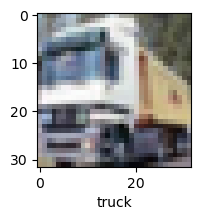

In [31]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
plot_sample(x_train, y_train, 1)

In [23]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
#normalization:
x_train = x_train/255.0
x_test= x_test/255.0

In [24]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3,3), input_shape = (x_train.shape[1],x_train.shape[2],
                                                                                         x_train.shape[3])),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')    
])

In [26]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4376 - accuracy: 0.4845
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0926 - accuracy: 0.6194
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9625 - accuracy: 0.6646
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8782 - accuracy: 0.6946
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8112 - accuracy: 0.7177
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7550 - accuracy: 0.7368
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7046 - accuracy: 0.7552
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6608 - accuracy: 0.7692
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6206 - accuracy: 0.7824
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [28]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(f'Test accuracy = {test_acc}.')

313/313 [==============================] - 2s 5ms/step - loss: 0.9351 - accuracy: 0.6979
Test accuracy = 0.6978999972343445.


In [30]:
y_test = y_test.reshape(-1, )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

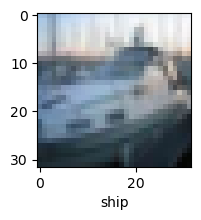

In [50]:
plot_sample(x_test, y_test, 2)

In [38]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[5.60575016e-02, 1.20576369e-04, 6.59932906e-04, 1.47649065e-01,
        4.38137242e-04, 2.01336950e-01, 3.12309735e-03, 1.52827233e-05,
        5.84725320e-01, 5.87414810e-03],
       [4.43700096e-03, 3.30331415e-01, 1.25326975e-08, 3.65499631e-08,
        4.92805852e-10, 2.16805740e-10, 1.55692021e-07, 4.50737753e-10,
        6.63732946e-01, 1.49840419e-03],
       [7.41647705e-02, 3.91267180e-01, 2.12665473e-04, 9.35420278e-04,
        1.94609005e-04, 7.94371226e-05, 6.72220835e-04, 4.01607191e-04,
        4.73283440e-01, 5.87886833e-02],
       [7.92100132e-01, 2.20540387e-04, 6.52759743e-04, 1.69223247e-04,
        2.05455399e-05, 6.06470394e-07, 5.28580094e-05, 2.32276761e-07,
        2.06781194e-01, 1.79620679e-06],
       [4.03171316e-06, 1.85379849e-06, 9.05820727e-02, 6.75134454e-03,
        5.48752733e-02, 2.10886879e-04, 8.47573459e-01, 3.73120415e-08,
        1.09205996e-06, 5.13575671e-08]], dtype=float32)

In [39]:
y_classes = [np.argmax(element) for element in y_pred]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [51]:
y_classes[2]

8

In [57]:
print(classification_report(y_test, y_classes))

NameError: name 'classification_report' is not defined